#**PRÁCTICA FINAL 2º CUATRIMESTRE**

**Pablo Otero y Javier Salmerón**

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

datos = pd.read_csv("airbnb-listings-cleaned.csv")

Cargamos los datos y las principales librerías

## **ANÁLISIS EXPLORATORIO**

In [ ]:
datos

,id,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10080,none,30899,Rami,2009-08-10,"Vancouver, British Columbia, Canada",within a few hours,85%,NaN,f,...,f,f,strict_14_with_grace_period,f,f,31,31,0,0,0.18
1,11400,none,42305,Jaynne,2009-09-30,"Vancouver, British Columbia, Canada",NaN,NaN,NaN,f,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,0.64
2,13188,none,51466,Family Guns,2009-11-04,"Vancouver, British Columbia, Canada",within an hour,100%,NaN,t,...,t,f,moderate,f,f,1,1,0,0,1.51
3,13357,none,52118,Liliana,2009-11-07,"Vancouver, British Columbia, Canada",within an hour,100%,NaN,f,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.51
4,13358,none,52116,Lynn,2009-11-07,"Vancouver, British Columbia, Canada",NaN,NaN,NaN,f,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832,32135798,none,125368592,James,2017-04-11,CA,within an hour,100%,NaN,f,...,f,f,flexible,f,f,4,0,4,0,NaN
4833,32151243,none,241187818,Cheung,2019-02-05,CA,NaN,NaN,NaN,f,...,t,f,flexible,f,f,1,1,0,0,NaN
4834,32152929,none,48291360,Craig,2015-11-05,US,within an hour,100%,NaN,f,...,f,f,flexible,f,f,3,0,3,0,NaN
4835,32160848,none,216510476,Forough,2018-09-21,US,NaN,NaN,NaN,f,...,f,f,flexible,f,f,1,1,0,0,NaN


In [ ]:
datos.set_index('id', inplace=True)

In [ ]:
print("Valores Nulos en cada variable:")
print(datos.isnull().sum())

Valores Nulos en cada variable:
experiences_offered                               0
host_id                                           0
host_name                                         1
host_since                                        1
host_location                                     7
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               682
Length: 81, dtype: int64


In [ ]:
datos.isnull().sum().sort_values(ascending=False)

neighbourhood_group_cleansed    4837
host_acceptance_rate            4837
square_feet                     4759
weekly_price                    4280
monthly_price                   4245
                                ... 
maximum_maximum_nights             0
minimum_nights_avg_ntm             0
maximum_nights_avg_ntm             0
smart_location                     0
experiences_offered                0
Length: 81, dtype: int64

In [ ]:
datos.dtypes

experiences_offered                              object
host_id                                           int64
host_name                                        object
host_since                                       object
host_location                                    object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 81, dtype: object

Usamos la columna Id como índice y luego observamos los valores NA y los tipos de variables

VARIABLES

In [ ]:
#Observamos las primeras 40 columnas, para ver si alguna variable no es necesaria
col40=datos.iloc[:,0:40]
col40

,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,monthly_price,security_deposit
id,,,,,,,,,,,,,,,,,,,,,
10080,none,30899,Rami,2009-08-10,"Vancouver, British Columbia, Canada",within a few hours,85%,NaN,f,Coal Harbour,...,6,2.0,2.0,4.0,Real Bed,1200.0,295.0,NaN,4750.0,0.0
11400,none,42305,Jaynne,2009-09-30,"Vancouver, British Columbia, Canada",NaN,NaN,NaN,f,Riley Park,...,1,1.0,1.0,1.0,Real Bed,0.0,60.0,385.0,1400.0,NaN
13188,none,51466,Family Guns,2009-11-04,"Vancouver, British Columbia, Canada",within an hour,100%,NaN,t,Riley Park,...,4,1.0,0.0,2.0,Real Bed,NaN,119.0,750.0,2500.0,0.0
13357,none,52118,Liliana,2009-11-07,"Vancouver, British Columbia, Canada",within an hour,100%,NaN,f,Chinatown,...,4,2.0,2.0,2.0,Real Bed,NaN,151.0,976.0,2887.0,787.0
13358,none,52116,Lynn,2009-11-07,"Vancouver, British Columbia, Canada",NaN,NaN,NaN,f,Downtown Vancouver,...,2,1.0,1.0,1.0,Real Bed,0.0,119.0,750.0,NaN,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32135798,none,125368592,James,2017-04-11,CA,within an hour,100%,NaN,f,Downtown Vancouver,...,1,1.0,0.0,1.0,Real Bed,NaN,43.0,NaN,NaN,NaN
32151243,none,241187818,Cheung,2019-02-05,CA,NaN,NaN,NaN,f,Downtown Vancouver,...,6,2.5,2.0,2.0,Real Bed,NaN,300.0,NaN,NaN,NaN
32152929,none,48291360,Craig,2015-11-05,US,within an hour,100%,NaN,f,Marpole,...,2,1.5,1.0,1.0,Real Bed,NaN,39.0,NaN,NaN,NaN


In [ ]:
col40.dtypes

experiences_offered              object
host_id                           int64
host_name                        object
host_since                       object
host_location                    object
host_response_time               object
host_response_rate               object
host_acceptance_rate            float64
host_is_superhost                object
host_neighbourhood               object
host_listings_count             float64
host_total_listings_count       float64
host_has_profile_pic             object
host_identity_verified           object
street                           object
neighbourhood                    object
neighbourhood_cleansed           object
neighbourhood_group_cleansed    float64
city                             object
state                            object
zipcode                          object
market                           object
smart_location                   object
country_code                     object
country                          object


In [ ]:
col40.isnull().sum().sort_values(ascending=False)

host_acceptance_rate            4837
neighbourhood_group_cleansed    4837
square_feet                     4759
weekly_price                    4280
monthly_price                   4245
host_response_time              2106
host_response_rate              2106
security_deposit                 785
host_neighbourhood               585
neighbourhood                    286
zipcode                          107
state                             11
host_location                      7
market                             6
beds                               6
city                               5
bedrooms                           2
host_total_listings_count          1
host_has_profile_pic               1
host_identity_verified             1
host_name                          1
host_listings_count                1
host_since                         1
host_is_superhost                  1
bathrooms                          0
price                              0
bed_type                           0
r

In [ ]:
col40_82= datos.iloc[:,40:82]
col40_82

,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
10080,195.0,1,$0.00,60,1124,60,60,1124,1124,60.0,...,f,f,strict_14_with_grace_period,f,f,31,31,0,0,0.18
11400,NaN,1,$0.00,364,364,364,364,364,364,364.0,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,0.64
13188,40.0,1,$0.00,2,1125,2,2,1125,1125,2.0,...,t,f,moderate,f,f,1,1,0,0,1.51
13357,197.0,2,$33.00,30,30,30,30,30,30,30.0,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.51
13358,65.0,1,$0.00,1,60,1,1,60,60,1.0,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32135798,NaN,1,$0.00,7,1125,7,7,1125,1125,7.0,...,f,f,flexible,f,f,4,0,4,0,NaN
32151243,NaN,1,$0.00,2,1125,2,2,1125,1125,2.0,...,t,f,flexible,f,f,1,1,0,0,NaN
32152929,NaN,1,$0.00,7,1125,7,7,1125,1125,7.0,...,f,f,flexible,f,f,3,0,3,0,NaN


In [ ]:
col40_82.dtypes

cleaning_fee                                    float64
guests_included                                   int64
extra_people                                     object
minimum_nights                                    int64
maximum_nights                                    int64
minimum_minimum_nights                            int64
maximum_minimum_nights                            int64
minimum_maximum_nights                            int64
maximum_maximum_nights                            int64
minimum_nights_avg_ntm                          float64
maximum_nights_avg_ntm                          float64
calendar_updated                                 object
has_availability                                 object
availability_30                                   int64
availability_60                                   int64
availability_90                                   int64
availability_365                                  int64
calendar_last_scraped                           

In [ ]:
col40_82.isnull().sum().sort_values(ascending=False)

license                                         1067
review_scores_value                              708
review_scores_location                           708
review_scores_checkin                            708
review_scores_communication                      707
review_scores_accuracy                           706
review_scores_cleanliness                        705
review_scores_rating                             705
first_review                                     682
last_review                                      682
reviews_per_month                                682
cleaning_fee                                     414
has_availability                                   0
calculated_host_listings_count_shared_rooms        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count                     0
require_guest_phone_verification                   0
require_guest_profile_picture                 

In [ ]:
print("Distribución:")
print(datos['calendar_last_scraped'].value_counts()) #Se puede eliminar, es el mismo dato siempre

Distribución:
2019-02-06    4837
Name: calendar_last_scraped, dtype: int64


In [ ]:
print("Distribución:")
print(datos['host_since'].value_counts())

Distribución:
2011-05-18    53
2009-08-10    31
2017-07-11    31
2015-07-14    27
2016-04-09    27
              ..
2017-04-28     1
2011-08-03     1
2014-02-20     1
2016-09-21     1
2019-02-05     1
Name: host_since, Length: 1899, dtype: int64


In [ ]:
#Variables que no tienen que ver con el precio de del airbnb
df = datos.drop(columns=['host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', 
                         'host_name', 'host_listings_count','host_total_listings_count',
                         'country_code', 'host_id','calendar_last_scraped',
                         'host_neighbourhood', 'zipcode','license',
                         'first_review','last_review', 'monthly_price',
                         'weekly_price','reviews_per_month','host_response_rate','host_location'], axis=1)
#Demasiados valores NA 
df = df.drop(columns=['host_acceptance_rate', 'square_feet', 'host_response_time'], axis=1)

In [ ]:
reviews = df.loc[: , "review_scores_rating":"review_scores_value"]
df['Average Review'] = reviews.mean(axis=1)

In [ ]:
df["Final_Neighbourhood"] = df["neighbourhood_group_cleansed"].fillna(df["neighbourhood_cleansed"])
df.drop(["neighbourhood", "neighbourhood_group_cleansed", "neighbourhood_cleansed"], axis=1, inplace=True)

In [ ]:
df= df.drop(columns=[ 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis=1)

In [ ]:
from datetime import datetime
# Convertir la columna 'host_since' en objetos de fecha y hora
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
# Calcular los años como host
df['Years_Being_Host'] = 2020 - df['host_since'].dt.year
df.drop(['host_since'], axis=1, inplace=True)

In [ ]:
df.dtypes

experiences_offered                              object
street                                           object
city                                             object
state                                            object
market                                           object
smart_location                                   object
country                                          object
latitude                                        float64
longitude                                       float64
is_location_exact                                object
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
bed_type                                         object
price                                           

In [ ]:
print("Variable Objetivo")
df.value_counts("price")

Variable Objetivo


price
150.0     231
199.0     174
100.0     162
98.0      151
119.0     132
         ... 
348.0       1
344.0       1
342.0       1
340.0       1
6500.0      1
Length: 323, dtype: int64

Hemos eliminado del dataframe, las columnas menos relevantes para el precio y también hemos eliminado 3 columnas que a pesar de ser importante como square meters, tienen demasiados valores NA para poder cambiarlos por otros valores.

Hemos eliminado calendar last scraped porque tenía el mismo valor en todas las filas.

Las columnas de reviews (accuracy, ratings, etc), las hemos unido en una sola como la media de todas las reviews de cada Id. Nos hemos quedado con la media y el resto de variables las hemos eliminado del dataframe.

Para la variable 'neighbourhood_group_cleansed', hemos usado los valores de la columna 'neighbourhood_cleansed' para rellenar los valores NA. Nos hemos quedado solo con la columna nueva que hemos creado con los NA cambiados, el resto de variables de neighbourhood las hemos eliminado.

Por úlitmo, en este punto hemos cambiado la variable host since, por una variable nueva que nos indique los años que lleva siendo host. Nos quedamos con la nueva variable creada y eliminamos la variable 'host_since'.

VALORES MISSING

In [ ]:
#Columnas con NA 
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)
print(null_counts)

security_deposit    785
Average Review      705
cleaning_fee        414
state                11
market                6
beds                  6
city                  5
bedrooms              2
Years_Being_Host      1
dtype: int64


In [ ]:
#Estas variables sustutuimos los NA por la media
df['security_deposit'] = df['security_deposit'].fillna(np.mean(df['security_deposit']))
df['cleaning_fee'] = df['cleaning_fee'].fillna(np.mean(df['cleaning_fee']))
df['Average Review'] = df['Average Review'].fillna(df['Average Review'].mode()[0])

In [ ]:
#Rellenamos los NA con cadenas vacías
df['state'].fillna("", inplace=True)
df['market'].fillna("", inplace=True) 

In [ ]:
#Borramos filas que tengan NA en las siguientes columnas
columns_to_convert1=['city','beds','bedrooms','Years_Being_Host']
df.dropna(subset=columns_to_convert1, inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

experiences_offered                             0
requires_license                                0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
calendar_updated                                0
has_availability                                0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
instant_bookable                                0
minimum_maximum_nights                          0
is_business_travel_ready                        0
cancellation_policy                             0
require_guest_profile_picture                   0
require_guest_phone_verification                0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0


In [ ]:
df.dtypes

experiences_offered                              object
street                                           object
city                                             object
state                                            object
market                                           object
smart_location                                   object
country                                          object
latitude                                        float64
longitude                                       float64
is_location_exact                                object
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
bed_type                                         object
price                                           

Observamos las variables que continúan teniendo NA. En las variables numéricas, 'cleaning fee','Average review'y 'Security Deposit' intercambiamos los NA por la media (son las variables con más NA).

En las variables 'State' y 'Market', no son numéricas por lo que rellenamos los NA por cadenas vacías, para que no desvirtuen en resultado final.

Finalmente de las variables, 'city','beds','bedrooms','Years_Being_Host', eliminamos las filas que contengan NA ya que tiene muy pocos valores NA ,<5, lo que permite eliminar las filas que contengan NA en estas variables (muy pocas). No lo cambiamos por la media porque en estas varibales no tendría tanto sentido.



CONVERTIR TODAS LAS VARIABLES NUMÉRICAS

In [ ]:
df1=df
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Obtener las columnas que deseas convertir
columns_to_convert2 = ['bedrooms','Average Review']

# Aplicar la conversión a tipo float en las columnas seleccionadas
df1[columns_to_convert2] = df[columns_to_convert2].astype(float)

Las variables, 'bedrooms','Average Review', son de tipo object pero sus datos son float, por lo que es fácil cambiarlas a numéricas.

In [ ]:
cat_features = df1.dtypes[df1.dtypes == 'object'].index.to_list()
num_features = df1.dtypes[df1.dtypes != 'object'].index.to_list()

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.6 MB/s eta 0:00:00


In [ ]:
from category_encoders.one_hot import OneHotEncoder
coder = OneHotEncoder()
coder.fit(df1[cat_features])
Dummies = pd.DataFrame(coder.transform(df1[cat_features]))
Dummies

,experiences_offered_1,street_1,street_2,street_3,street_4,street_5,street_6,street_7,street_8,street_9,...,Final_Neighbourhood_14,Final_Neighbourhood_15,Final_Neighbourhood_16,Final_Neighbourhood_17,Final_Neighbourhood_18,Final_Neighbourhood_19,Final_Neighbourhood_20,Final_Neighbourhood_21,Final_Neighbourhood_22,Final_Neighbourhood_23
id,,,,,,,,,,,,,,,,,,,,,
10080,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11400,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13188,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13357,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13358,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32135798,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32151243,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32152929,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df2=df1.join(Dummies)
df2 = df2.drop(cat_features, axis = 1)

In [ ]:
df2.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,Final_Neighbourhood_14,Final_Neighbourhood_15,Final_Neighbourhood_16,Final_Neighbourhood_17,Final_Neighbourhood_18,Final_Neighbourhood_19,Final_Neighbourhood_20,Final_Neighbourhood_21,Final_Neighbourhood_22,Final_Neighbourhood_23
count,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,...,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000,4823.000000
mean,49.262074,-123.110295,3.512337,1.320340,1.470454,1.869376,164.001451,372.893899,79.536783,1.910015,...,0.025710,0.029857,0.012440,0.018661,0.012026,0.004561,0.017624,0.016380,0.014306,0.021771
std,0.020507,0.039330,2.330216,0.667749,1.060542,1.270351,199.656196,464.358120,58.443871,1.578116,...,0.158286,0.170210,0.110852,0.135337,0.109012,0.067391,0.131594,0.126944,0.118763,0.145949
min,49.202898,-123.216422,1.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.249651,-123.129969,2.000000,1.000000,1.000000,1.000000,80.000000,150.000000,40.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.266949,-123.113826,3.000000,1.000000,1.000000,1.000000,119.000000,300.000000,75.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.278874,-123.084689,4.000000,1.500000,2.000000,2.000000,196.000000,500.000000,100.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,49.293416,-123.023864,16.000000,8.000000,30.000000,25.000000,6500.000000,6561.000000,500.000000,16.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Hemos distribuído el data en 2 partes, una con las variables categóricas y la otra con las numéricas.

De las variables categóricas hemos creado dummies para así tener todos las variables de forma numérica.

Finalmente las dummies las hemos unido al dataframe y hemos borrado las variables tipo object del data.

MATRIZ DE CORRELACIÓN

In [ ]:
import seaborn as sns

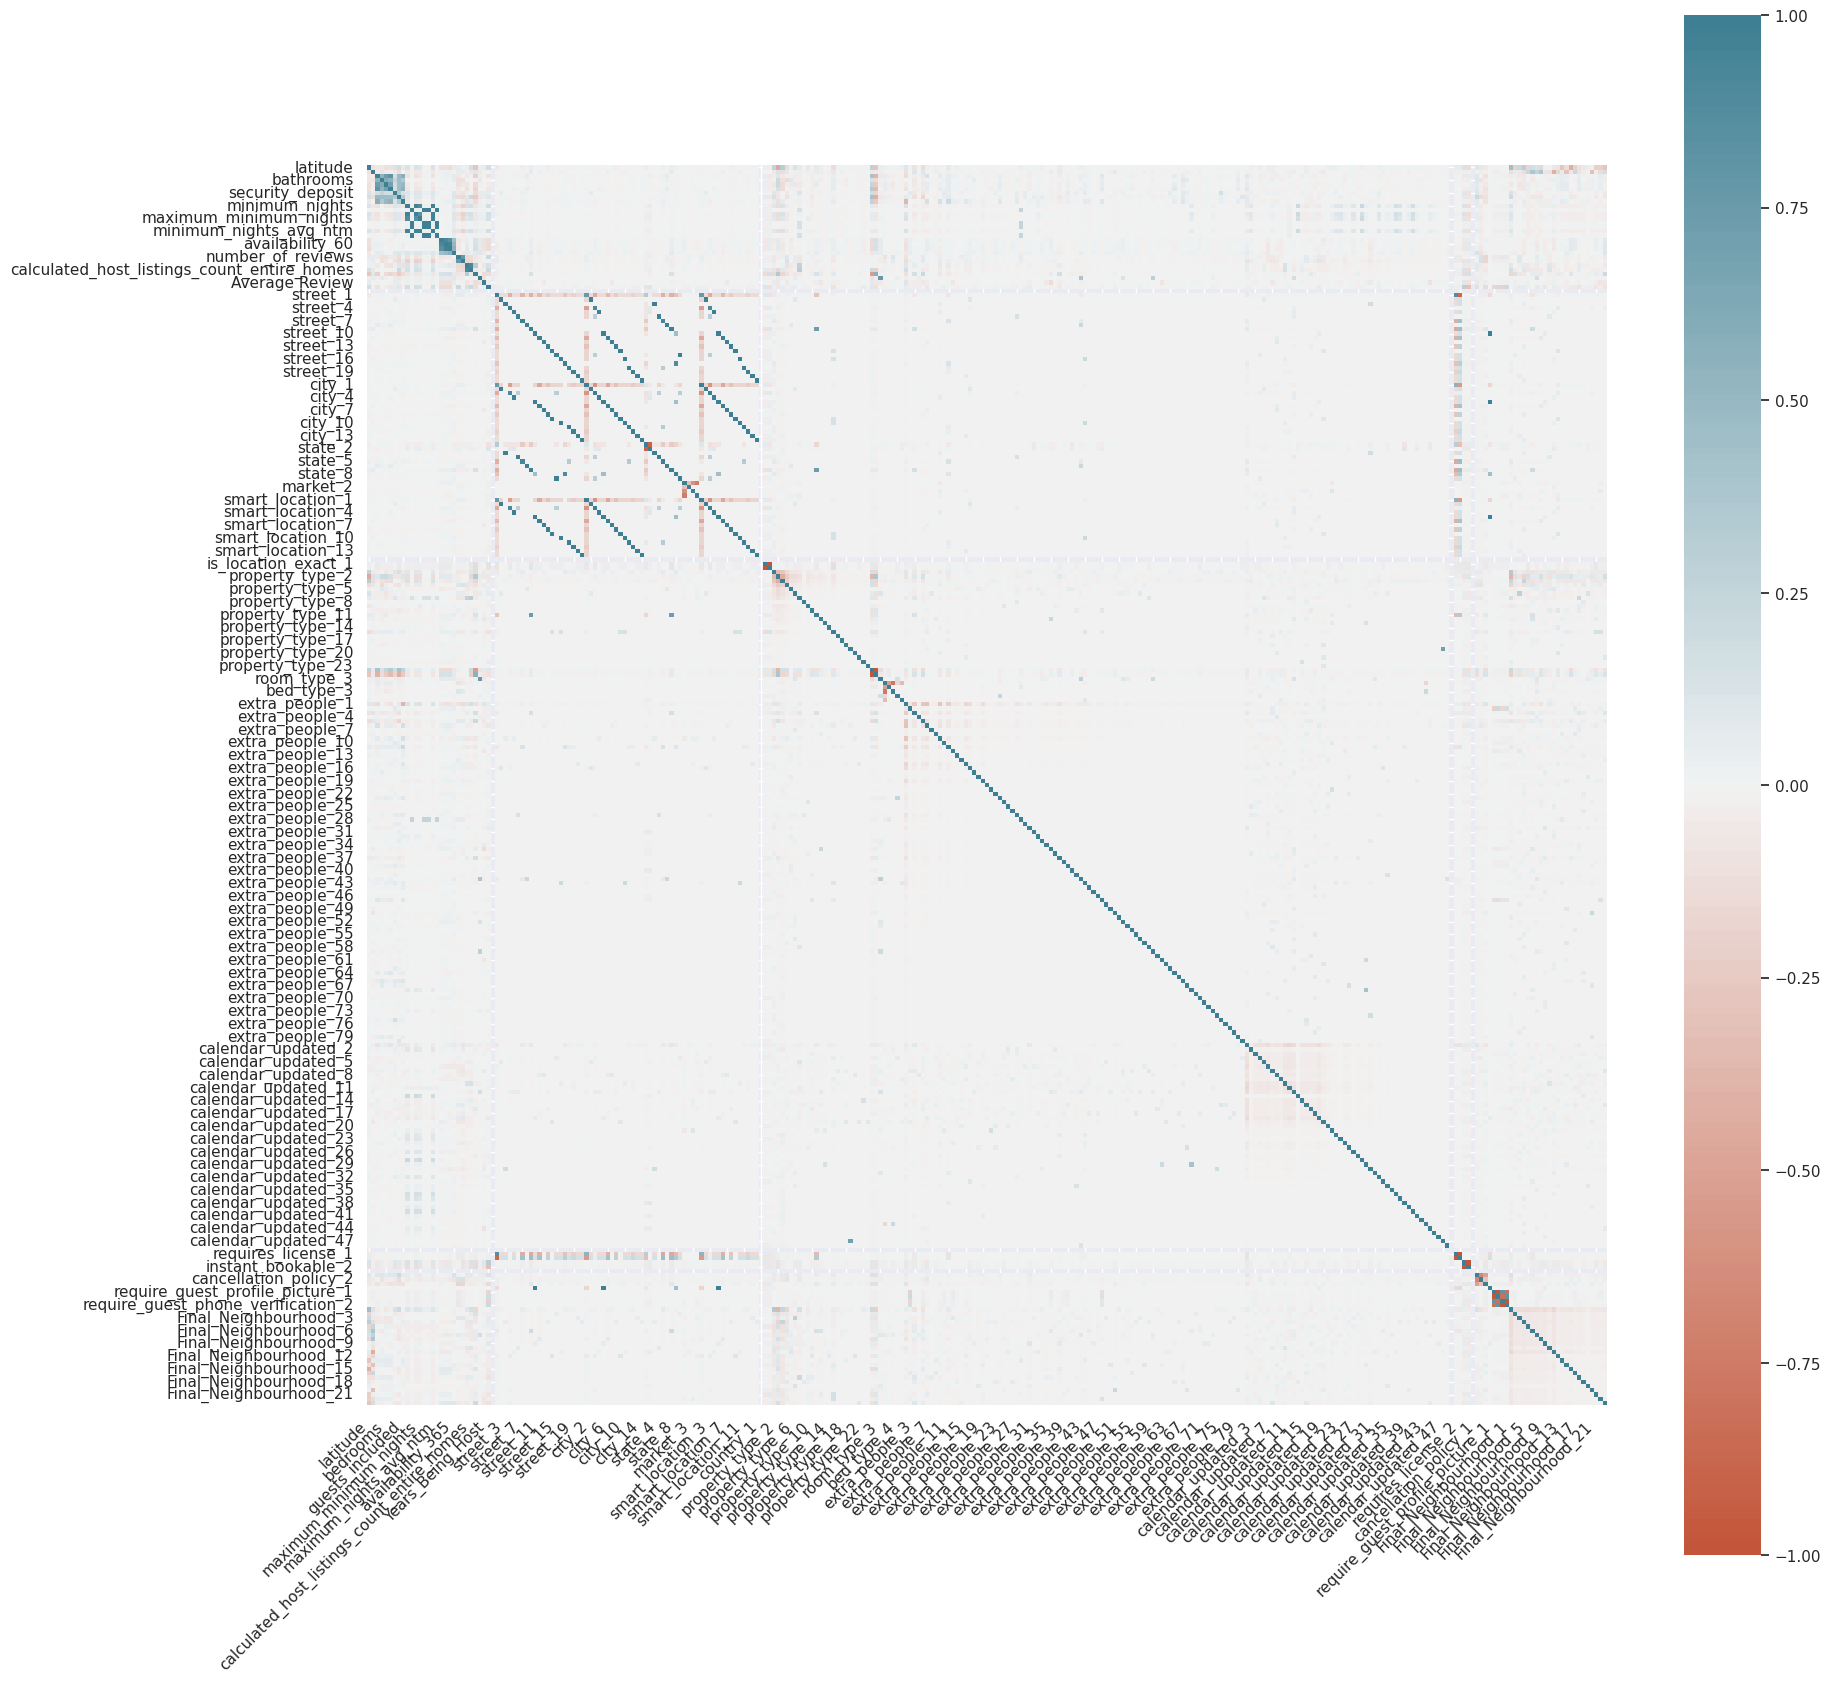

In [ ]:
Correlation = df2.drop(['price'], axis = 1)

sns.set(rc = {'figure.figsize':(20,20)})


corr = Correlation.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<ipython-input-38-228d6200280c>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Correlation.corr()


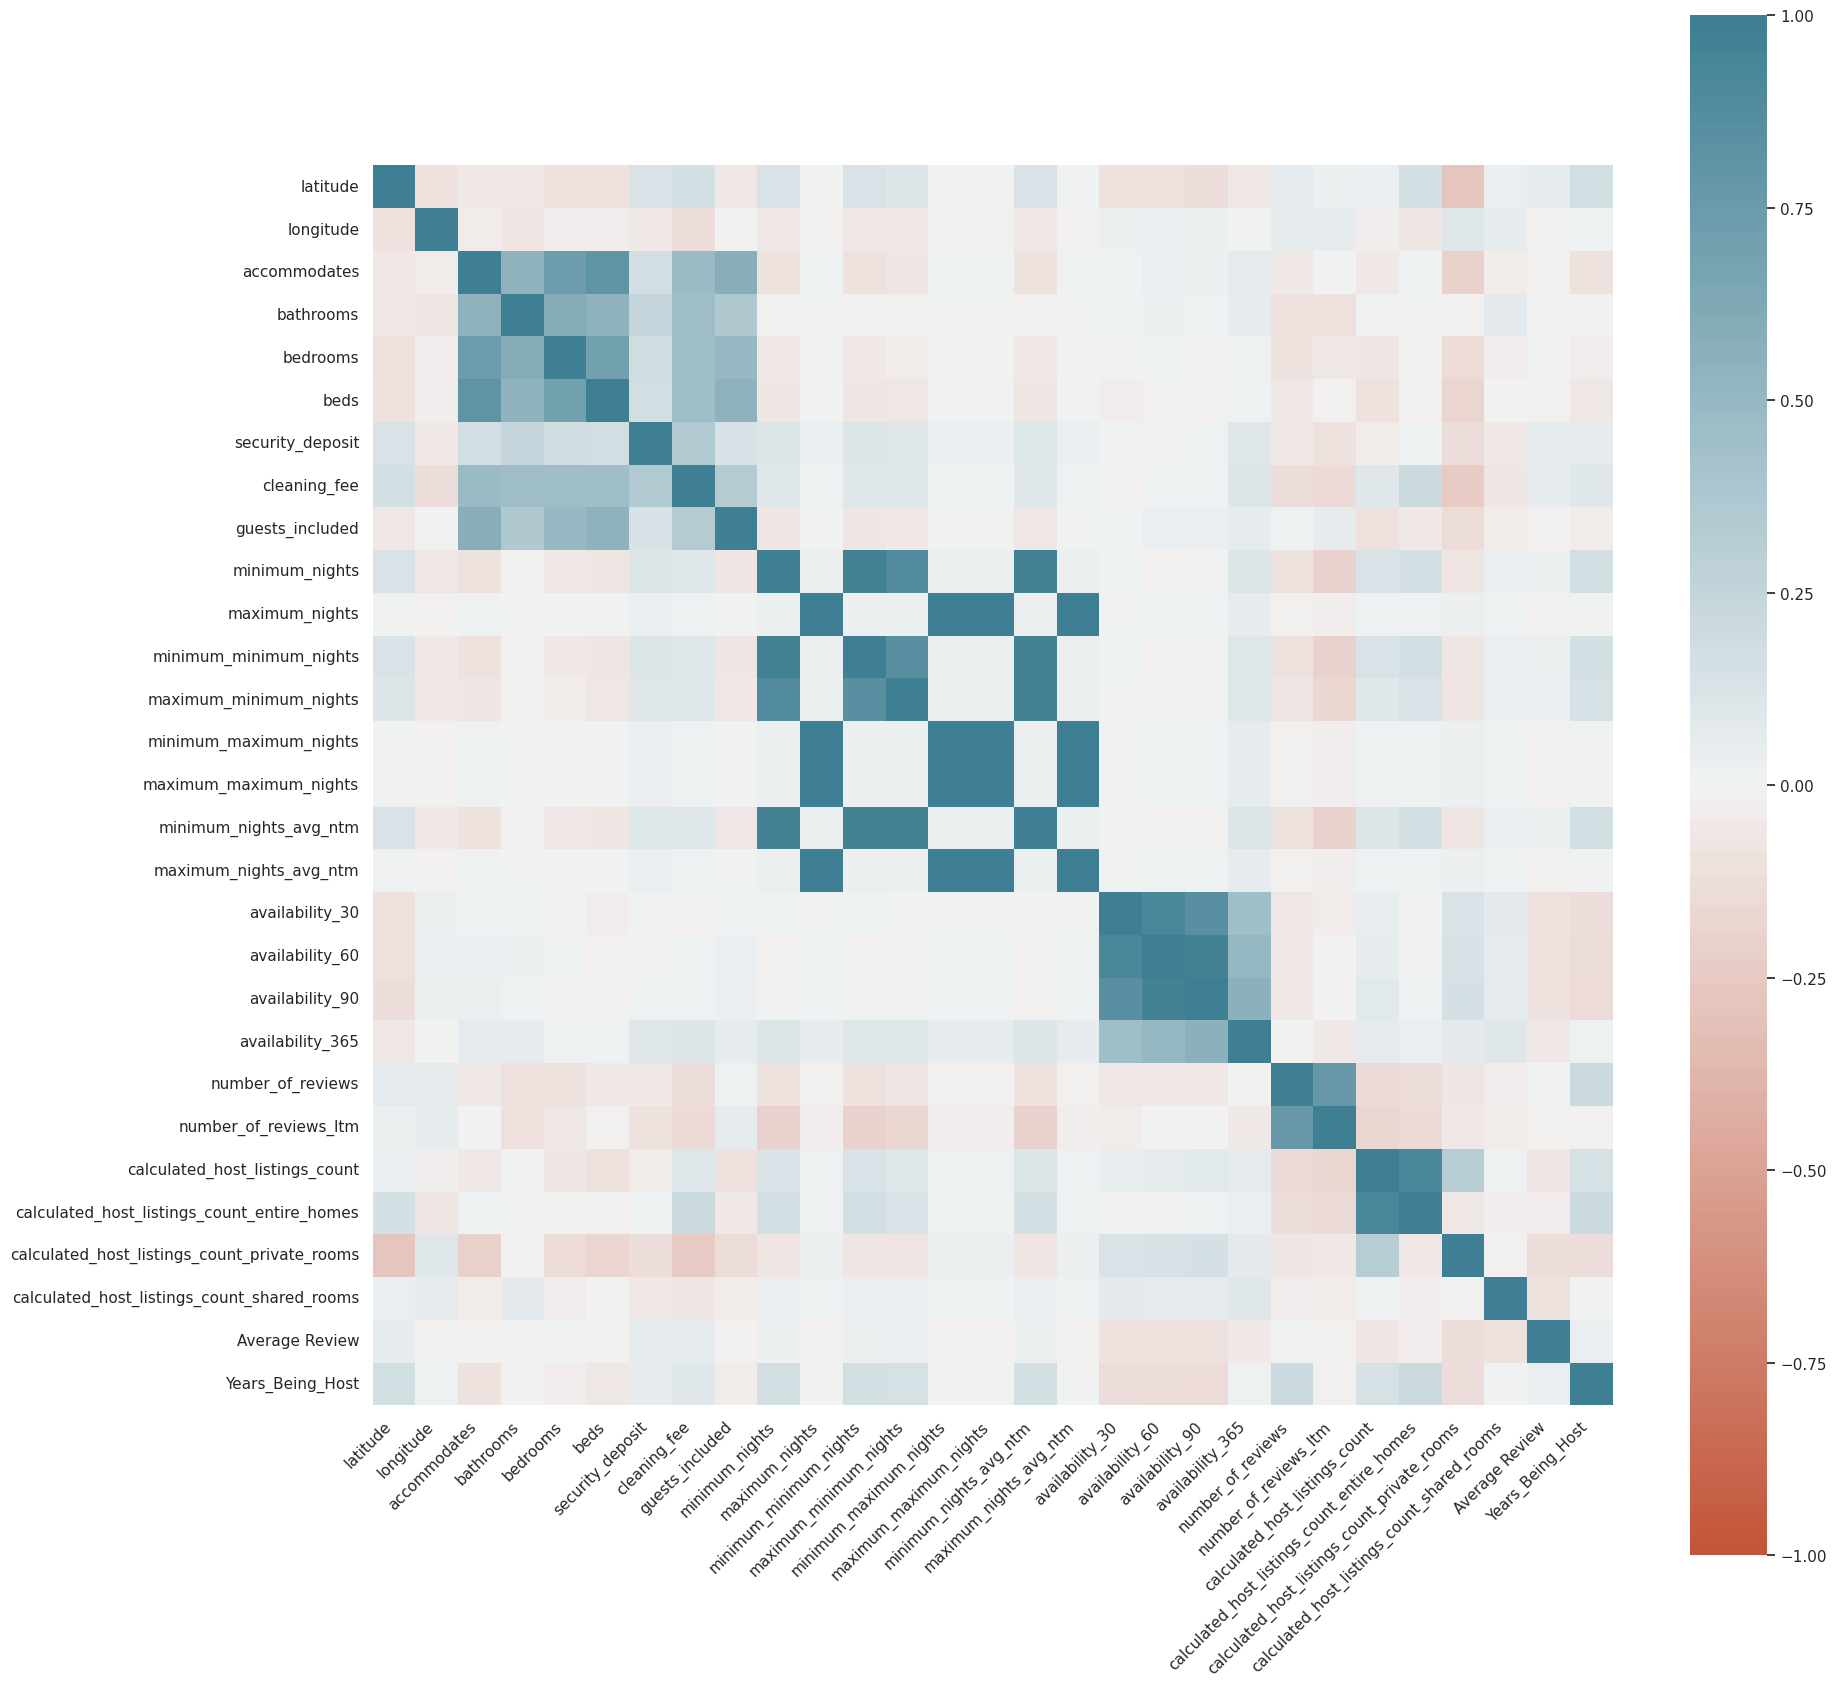

In [ ]:
Correlation = df1.drop(['price'], axis = 1)

sns.set(rc = {'figure.figsize':(20,20)})


corr = Correlation.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
df2 = df2.drop(['availability_90','availability_60','maximum_minimum_nights','calculated_host_listings_count_entire_homes','minimum_minimum_nights'], axis = 1)

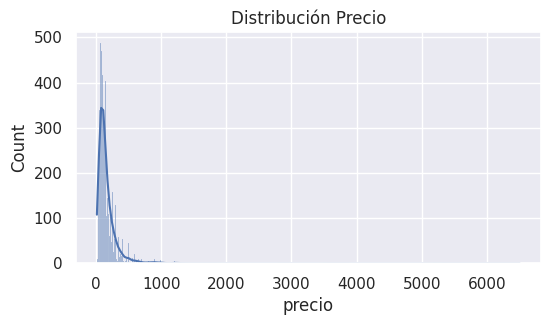

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=df2, x='price', kde=True,ax=ax)
ax.set_title("Distribución Precio")
ax.set_xlabel('precio');

In [ ]:
df2['price'].describe()

count    4823.000000
mean      164.001451
std       199.656196
min        14.000000
25%        80.000000
50%       119.000000
75%       196.000000
max      6500.000000
Name: price, dtype: float64

In [ ]:
#Eliminamos valores outliers
df2 = df2[(df1['price'] <= 250)]

En la primera matriz, tenemos todas las variables dummies, por lo que es difícil interpretar los datos, por lo que para la matriz hemos cogido el dataframe anterior al cambio por dummies.

Hemos observado en la segunda matriz correlaciones coherentes, como entre camas y baños (más camas, más baños). También hemos obervado variables muy similares que hemos decedido eliminar y quedarnos con una de ellas.

Tras ello, hemos observado la variable objetivo, y hemos visto que los precios el 75% están entre 0 y 196, por lo que hemos decidido filtrar como  máximo a precios de 250 para eliminar valores outliers.

TRAIN Y TEST

In [ ]:
from sklearn.model_selection import train_test_split

df2_train, df2_test = train_test_split(df2, test_size = 0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
train_scaler = std_scaler.fit(df2_train)


std_scaler

df2_train_normalized = pd.DataFrame(std_scaler.fit_transform(df2_train.values), columns= df2_train.columns)

In [ ]:
df2_train_normalized = pd.DataFrame(df2_train_normalized, index=df2_train.index, columns=df2_train.columns)

In [ ]:
X_norm = np.array(df2_train_normalized.drop(['price'],axis = 1))
X = np.array(df2_train.drop(['price'],axis = 1))


y = np.array(df2_train['price']) 

In [ ]:
from sklearn.preprocessing import StandardScaler

df2_test_normalized = pd.DataFrame(std_scaler.transform(df2_test), columns=df2_test.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
df2_test_normalized = pd.DataFrame(df2_test_normalized, index=df2_test.index, columns=df2_test.columns)

In [ ]:
test_x_norm = np.array(df2_test_normalized.drop(['price'],axis = 1))
test_x = np.array(df2_test.drop(['price'],axis = 1))
test_y = np.array(df2_test['price'])

Hemos separado en los conjuntos test y train y luego hemos normalizado los datos.

## **MODELOS**

Vamos a tratar de resolver predecir los resultados con ciertos modelos. Nos basaremos para compararar que modelo es mejor en mean square error. El objetivo es comparar que modelo dispone de menor MSE para poder hacer uso de dicho modelo y predecir.

Para manejar los modelos tratarmeos de optimizar dichos modelos, esto es calibar el modelo a nuestro antojo para, supuestamente, obtener mejores resultados.

REGRESIÓN LINEAL

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
lr = linear_model.LinearRegression()

In [ ]:
lr.fit(X,y)

LinearRegression()

In [ ]:
lr.score(X,y)

0.5490317031149498

Evaluación

In [ ]:
predictions = lr.predict(test_x)

In [ ]:
predicted_data_norm = df2_test_normalized.copy()
predicted_data_norm['price'] = predictions

In [ ]:
predicted_data_unorm = pd.DataFrame(index=predicted_data_norm.index, 
                                    columns=predicted_data_norm.columns, 
                                    data=train_scaler.inverse_transform(predicted_data_norm))

In [ ]:
 predicted_data_unorm['predicted_price'] = predicted_data_unorm['price']

In [ ]:
predicted_data_unorm['price'] = df2_test['price']

In [ ]:
predicted_data_unorm['price']

id
22306110     91.0
18179282     66.0
20836736    198.0
20285210    159.0
24411670     75.0
            ...  
31150620    125.0
31542902    140.0
11305898     91.0
27494463     66.0
30748443     68.0
Name: price, Length: 1218, dtype: float64

In [ ]:
predicted_data_unorm[['price','predicted_price']].head(3)

,price,predicted_price
id,,
22306110,91.0,7222.810750
18179282,66.0,4652.269050
20836736,198.0,8815.085943


In [ ]:
rmse_linear = np.sqrt(((predicted_data_unorm['price'] - predicted_data_unorm['predicted_price'])**2).mean())
rmse_linear

6183.281694649284

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predicted_data_unorm['price'], predicted_data_unorm['predicted_price'], squared=False)

6183.281694649284

In [ ]:
lr_error = round(np.mean(100*np.sqrt((predicted_data_unorm['price'] - predicted_data_unorm['predicted_price'])**2)/predicted_data_unorm['price']),2)
lr_error

5824.07

KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
knn.fit(X,y)

KNeighborsRegressor()

In [ ]:
knn.score(X,y)

0.4286648754579504

EVALUACIÓN

In [ ]:
knn.score(test_x,test_y)

0.17665702883967394

In [ ]:
knn.predict(test_x)[0]

66.8

In [ ]:
knn_data_norm = df2_test_normalized.copy()
knn_data_norm['price'] = knn.predict(test_x)

In [ ]:
knn_data_unorm = pd.DataFrame(index=knn_data_norm.index, 
                              columns=knn_data_norm.columns, 
                              data=std_scaler.inverse_transform(knn_data_norm))

In [ ]:
knn_data_unorm['predicted_price'] = knn_data_unorm['price']
knn_data_unorm['price'] = df2_test['price']

In [ ]:
knn_data_unorm['price']=knn_data_unorm['price'].replace(df2_test['price'])

In [ ]:
knn_data_unorm[['price','predicted_price']].head(4)

,price,predicted_price
id,,
22306110,91.0,3622.370743
18179282,66.0,3737.917488
20836736,198.0,8128.693781
20285210,159.0,7036.251832


In [ ]:
rmse_knn = np.sqrt(((knn_data_unorm['price'] - knn_data_unorm['predicted_price'])**2).mean())

In [ ]:
rmse_knn

6195.194814027495

In [ ]:
knn_error = round(np.mean(100*np.sqrt((knn_data_unorm['price'] - knn_data_unorm['predicted_price'])**2)/knn_data_unorm['price']),2)
knn_error

6421.49

ÁRBOL DE DECISIÓN

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor( max_depth=6)
regressor.fit(X, y)

y_pred = regressor.predict(test_x)

In [ ]:
regressor.score(X,y)

0.543125569090058

In [ ]:
y_pred = regressor.predict(test_x)

EVALUACIÓN

In [ ]:
regressor.score(test_x,test_y)

0.46590089833097725

In [ ]:
data_eval = df2_test.copy()
data_eval['Price_predicted'] =  regressor.predict(test_x)
rmse_tree = np.sqrt(((data_eval['price'] - data_eval['Price_predicted'])**2).mean())
rmse_tree

37.48667710903701

In [ ]:
tree_error = round(np.mean(100*np.sqrt((data_eval['price'] - data_eval['Price_predicted'])**2)/data_eval['price']),2)
tree_error

30.28

Profundidad del árbol: 6
Número de nodos terminales: 56


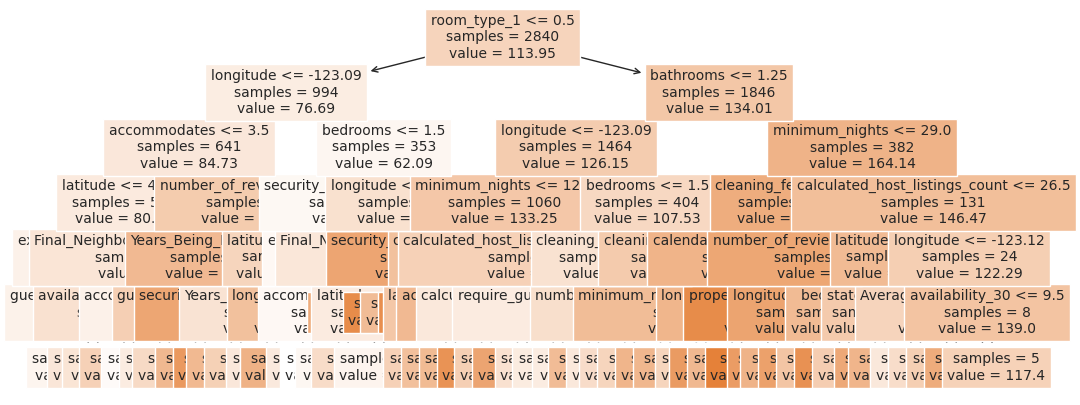

In [ ]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {regressor.get_depth()}")
print(f"Número de nodos terminales: {regressor.get_n_leaves()}")

plot = plot_tree(
            decision_tree = regressor,
            feature_names = data_eval.drop(columns = "price").columns,
            class_names   = 'price',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'ccp_alpha': array([ 0.        ,  4.21052632,  8.42105263, 12.63157895, 16.84210526,
       21.05263158, 25.26315789, 29.47368421, 33.68421053, 37.89473684,
       42.10526316, 46.31578947, 50.52631579, 54.73684211, 58.94736842,
       63.15789474, 67.36842105, 71.57894737, 75.78947368, 80.        ])},
             return_train_score=True)

In [ ]:
grid.best_params_

{'ccp_alpha': 12.631578947368421}

Profundidad del árbol: 6
Número de nodos terminales: 15


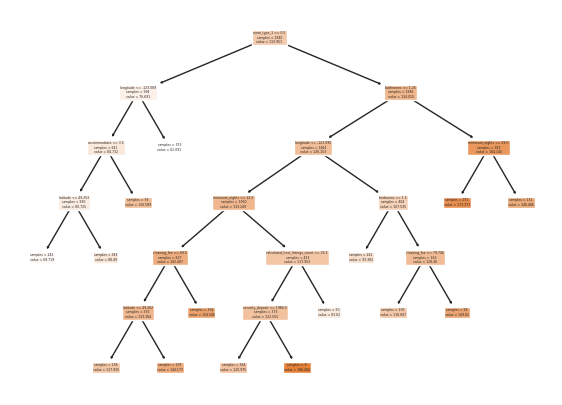

In [ ]:
#Optimizamos el árbol (lo podamos)
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = data_eval.drop(columns = "price").columns,
            class_names   = 'price',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

In [ ]:
regressor.predict(test_x)

array([113.03092784,  63.88709677, 152.73720137, ..., 113.03092784,
        63.88709677,  63.88709677])

In [ ]:
data_eval = df2_test.copy()
data_eval['Price_predicted'] =  modelo_final.predict(test_x)
rmse_tree = np.sqrt(((data_eval['price'] - data_eval['Price_predicted'])**2).mean())
rmse_tree

37.48736131372967

In [ ]:
tree_error = round(np.mean(100*np.sqrt((data_eval['price'] - data_eval['Price_predicted'])**2)/data_eval['price']),2)
tree_error
#Nos da iguales valores que antes de optimizarlo

31.82

GRADIENT BOOST

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
boost = GradientBoostingRegressor()
boost.fit(X, y)
boost.score(X, y)

0.6339181251632169

In [ ]:
boost.score(test_x, test_y)

0.5784117490591449

In [ ]:
rmse_gboost = mean_squared_error(test_y, 
                                 boost.predict(test_x), squared=False)
rmse_gboost

33.30506390313072

In [ ]:
gboost_error = round(np.mean(100*np.sqrt((test_y - boost.predict(test_x))**2)/test_y),2)
gboost_error

26.93

In [ ]:
boost.feature_importances_

array([4.04420688e-02, 9.11097515e-02, 7.94687696e-02, 3.54275058e-02,
       6.24407877e-02, 2.60250936e-03, 2.06388280e-02, 4.55742786e-02,
       1.73387563e-02, 4.56465851e-02, 1.17522104e-03, 1.13228067e-03,
       4.99345217e-04, 3.93418473e-03, 7.98947520e-04, 7.26223247e-03,
       1.39362350e-02, 1.10232818e-02, 6.16305185e-03, 2.42871038e-02,
       6.21036225e-03, 5.45637429e-04, 6.17825259e-03, 5.39265164e-03,
       0.00000000e+00, 9.65906534e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.10346462e-04, 0.00000000e+00, 1.52738906e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.43055340e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
features = [(a,b) for a,b in zip(df2_train.columns, boost.feature_importances_)]

In [ ]:
features = sorted(features, key= lambda c:c[1], reverse=True)
features

[('property_type_23', 0.3786595950734238),
 ('longitude', 0.09110975153956967),
 ('accommodates', 0.07946876957255385),
 ('bedrooms', 0.06244078770812111),
 ('guests_included', 0.04564658510875259),
 ('security_deposit', 0.04557427857400703),
 ('latitude', 0.04044206884598503),
 ('bathrooms', 0.03542750576309363),
 ('number_of_reviews_ltm', 0.024287103757500334),
 ('price', 0.020638827960716075),
 ('cleaning_fee', 0.01733875628760618),
 ('property_type_3', 0.014728405578535374),
 ('availability_30', 0.013936234970167296),
 ('availability_365', 0.011023281814583783),
 ('require_guest_phone_verification_2', 0.00892810512895598),
 ('property_type_9', 0.008018366444985403),
 ('property_type_5', 0.007627893463660463),
 ('maximum_nights_avg_ntm', 0.00726223246741127),
 ('calculated_host_listings_count', 0.006210362251420184),
 ('calculated_host_listings_count_shared_rooms', 0.006178252587382195),
 ('number_of_reviews', 0.006163051845642104),
 ('Average Review', 0.0053926516384227765),
 ('pro

## **HIPERPARÁMETROS**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing


parameters = ({'learning_rate':[0.01, 0.1],
               'n_estimators': [200, 100],
               'subsample': [1, 0.7],
               'min_samples_split': [2, 4]})


# Aplicamos la tecnica de validación cruzada

grid = RandomizedSearchCV(
        estimator  = boost,
        param_distributions = parameters,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X, y = y)


resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,param_subsample,param_n_estimators,param_min_samples_split,param_learning_rate,mean_test_score,std_test_score,mean_train_score,std_train_score
9,0.7,200,2,0.1,-1282.650074,55.611880,-725.441932,10.223345
13,0.7,200,4,0.1,-1283.720589,25.538728,-730.447041,8.268816
12,1,200,4,0.1,-1301.413204,49.491090,-812.108393,14.150701
8,1,200,2,0.1,-1305.013561,50.426596,-807.367279,18.238937
11,0.7,100,2,0.1,-1311.613330,48.108171,-936.078874,7.322226
15,0.7,100,4,0.1,-1319.930634,42.499210,-933.598265,7.069528
10,1,100,2,0.1,-1324.275599,54.025479,-972.290783,13.209220
14,1,100,4,0.1,-1325.285934,54.042897,-970.310680,9.836484
5,0.7,200,4,0.01,-1515.490799,83.318143,-1396.857143,16.488171
1,0.7,200,2,0.01,-1517.915307,85.664464,-1396.720688,14.908380


De entre estas "mezclas" de parametros realizados, concluimos que el que dispone de menos error es aquel con las siguientes carcteristicas:

Subsample: 0,7
N_estimators: 200
Min Sample Split: 2
Learning Rate: 0.1

Con estos resultados obtendremos un mean train score de -665.53, mean test score de -1168.14

## **CONLUSIÓN FINAL**

Para concluir, de los  modelos estudiados, escogeriamos Gradient Boost o el Árbol de decisión. Ambos modelos ofrecen un MSE (Mean Square Error) mucho menor a los otros 2. Los modelos de Regresión y el KNN tienen un score mucho más bajo y un MSE muy alto (el error del modelo de Regresión es de 5825.58 y el del KNN es de 6037.07). Por lo tanto el KNN y el de Regresión no son buenos modelos en este caso.

El Gradient Boost y el Árbol de decisión son similares, el Gradient Boost tienen un  score bueno y mucho mayor a los otros 3 modelos. Ambos tienen un MSE mucho más bajo que los otros dos modelos (el error del Gradient Boost es de 28.14 y el del Árbol es de 31,33).

En definitiva el Gradient Boost es el mejor modelo, ya que tiene mejor score que el Árbol de Decisión y en cuanto al error ambos modelos son muy similares. 

Cabe destacar, que el Árbol de decisión sigue  de cerca al modelo de Gradient Boost, y ademas es capaza de darnos una perspectiva bastante mas intuitiva del criterio de los propiertarios para poner un precio a sus propiedades (gracias al esquema visual que nos puede aportar).

ORDEN MODELOS:

-MUY BUENOS:
   - Gradient Boost
   - Árbol de Decisión

-MENOS BUENOS:
   - Regresión Lineal
   - KNN